In [40]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# Set the path to the dataset directory
dataset_dir = r"C:\Users\Gaurav\Desktop\Compiler Design\Plant_leaf_diseases_dataset_without_augmentation\Plant_leave_diseases_dataset_without_augmentation"

# Set the image and batch size
img_height, img_width = 224, 224
batch_size = 32

# Define the labels
labels = [
    "Apple___Apple_scab",
    "Apple___Black_rot",
    "Apple___Cedar_apple_rust",
    "Apple___healthy",
    "Background_without_leaves",
    "Blueberry___healthy",
    "Cherry___healthy",
    "Cherry___Powdery_mildew",
    "Corn___Cercospora_leaf_spot Gray_leaf_spot",
    "Corn___Common_rust",
    "Corn___healthy",
    "Corn___Northern_Leaf_Blight",
    "Grape___Black_rot",
    "Grape___Esca_(Black_Measles)",
    "Grape___healthy",
    "Grape___Leaf_blight_(Isariopsis_Leaf_Spot)",
    "Orange___Haunglongbing_(Citrus_greening)",
    "Peach___Bacterial_spot",
    "Peach___healthy",
    "Pepper,_bell___Bacterial_spot",
    "Pepper,_bell___healthy",
    "Potato___Early_blight",
    "Potato___healthy",
    "Potato___Late_blight",
    "Raspberry___healthy",
    "Soybean___healthy",
    "Squash___Powdery_mildew",
    "Strawberry___Leaf_scorch",
    "Strawberry___Leaf_healthy",
    "Tomato___Bacterial_spot",
    "Tomato___Early_blight",
    "Tomato___healthy",
    "Tomato___Late_blight",
    "Tomato___Leaf_Mold",
    "Tomato___Septoria_leaf_spot",
    "Tomato___Spider_mites Two-spotted_spider_mite",
    "Tomato___Target_Spot",
    "Tomato___Tomato_mosaic_virus",
    "Tomato___Tomato_Yellow_Leaf_Curl_Virus"
]

# Data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)
# Load the dataset using the data generator
train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 44371 images belonging to 39 classes.
Found 11077 images belonging to 39 classes.


In [28]:
model = tf.keras.Sequential([
    tf.keras.applications.ResNet50( include_top=False,weights='imagenet',input_shape=(img_height, img_width, 3)),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(labels), activation='softmax')
])

In [29]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [30]:
num_epochs = 10
history = model.fit(
    train_generator,
    epochs=num_epochs,
    validation_data=validation_generator
)

Epoch 1/10
1387/1387 [==============================] - 11690s 8s/step - loss: 0.4912 - accuracy: 0.8571 - val_loss: 0.5070 - val_accuracy: 0.8529
Epoch 2/10
1387/1387 [==============================] - 9888s 7s/step - loss: 0.1689 - accuracy: 0.9453 - val_loss: 0.6900 - val_accuracy: 0.8025
Epoch 3/10
1387/1387 [==============================] - 40627s 29s/step - loss: 0.1238 - accuracy: 0.9590 - val_loss: 0.5041 - val_accuracy: 0.8581
Epoch 4/10
1387/1387 [==============================] - 10608s 8s/step - loss: 0.1067 - accuracy: 0.9641 - val_loss: 0.5787 - val_accuracy: 0.8467
Epoch 5/10
1387/1387 [==============================] - 10946s 8s/step - loss: 0.0916 - accuracy: 0.9697 - val_loss: 0.6950 - val_accuracy: 0.8276
Epoch 6/10
1387/1387 [==============================] - 12198s 9s/step - loss: 0.0767 - accuracy: 0.9748 - val_loss: 0.6451 - val_accuracy: 0.8545
Epoch 7/10
1387/1387 [==============================] - 9535s 7s/step - loss: 0.0684 - accuracy: 0.9762 - val_loss: 0.

In [35]:
model.save('C:/Users/Gaurav/Desktop/Research/model.h5')
test_image_path = "C:\\Users\\Gaurav\\Desktop\\Compiler Design\\Plant_leaf_diseases_dataset_without_augmentation\\Plant_leave_diseases_dataset_without_augmentation\\Tomato___Bacterial_spot\\image(16).jpg"
test_image = tf.keras.preprocessing.image.load_img(test_image_path, target_size=(img_height, img_width))
test_image = tf.keras.preprocessing.image.img_to_array(test_image)
test_image = test_image / 255.0
test_image = tf.expand_dims(test_image, axis=0)

predicted_probabilities = model.predict(test_image)[0]
predicted_label_index = tf.argmax(predicted_probabilities)
predicted_label = labels[predicted_label_index]

print("Predicted label:", predicted_label)


1/1 [==============================] - 0s 92ms/step
Predicted label: Tomato___Bacterial_spot


In [36]:
precision_val = []
recall_val = []
f1_val = []
accuracy_val=[]
# Calculate precision, recall, and F1 score for each epoch
for epoch in range(num_epochs):
    y_pred_val = model.predict(validation_generator)
    y_pred_val = np.argmax(y_pred_val, axis=1)
    y_true_val = validation_generator.classes
    precision = precision_score(y_true_val, y_pred_val, average='weighted', zero_division=1.0)
    recall = recall_score(y_true_val, y_pred_val, average='weighted')
    f1 = f1_score(y_true_val, y_pred_val, average='weighted')
    precision_val.append(precision)
    recall_val.append(recall)
    f1_val.append(f1)


347/347 [==============================] - 500s 1s/step


Validation Accuracy: []
Validation Precision: [0.04730139000663821, 0.047649023657896514, 0.04260978549634388, 0.04273378277466035, 0.04468328074419798, 0.04404435662219358, 0.04481733910884645, 0.04532552320154995, 0.04698713066085557, 0.04323040038777715]
Validation Recall: [0.04748578134874063, 0.04811772140471247, 0.042430260900965966, 0.04288164665523156, 0.04477746682314706, 0.04477746682314706, 0.04504829827570642, 0.04558996118082513, 0.0468538412927688, 0.04369414101290963]
Validation F1 Score: [0.04717708635281641, 0.04764841240010647, 0.0423293296647748, 0.04263958967221996, 0.044539386797414385, 0.04422799638837125, 0.04475122997227559, 0.04533689003617236, 0.04669676137069252, 0.043294959114466486]
Validation Confusion Matrix:
[[ 1  1  0 ... 14  1  1]
 [ 1  0  0 ...  7  1  2]
 [ 1  0  0 ...  3  0  0]
 ...
 [10 12  4 ... 81  8 23]
 [ 0  1  0 ...  6  1  2]
 [ 6  2  0 ... 16  1  4]]


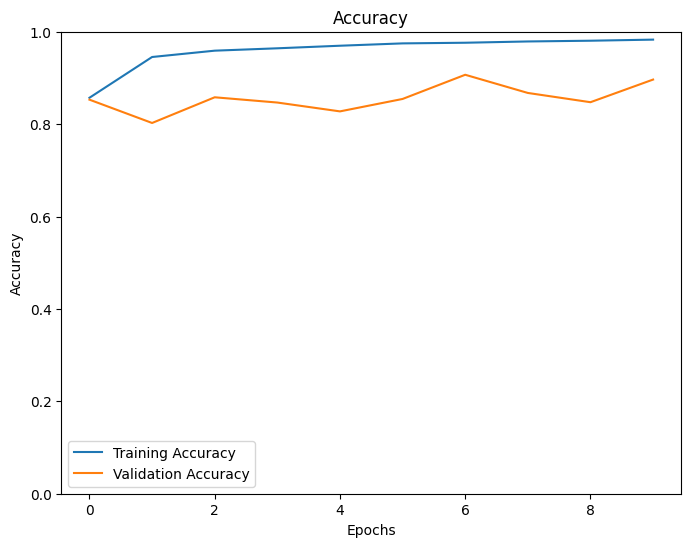

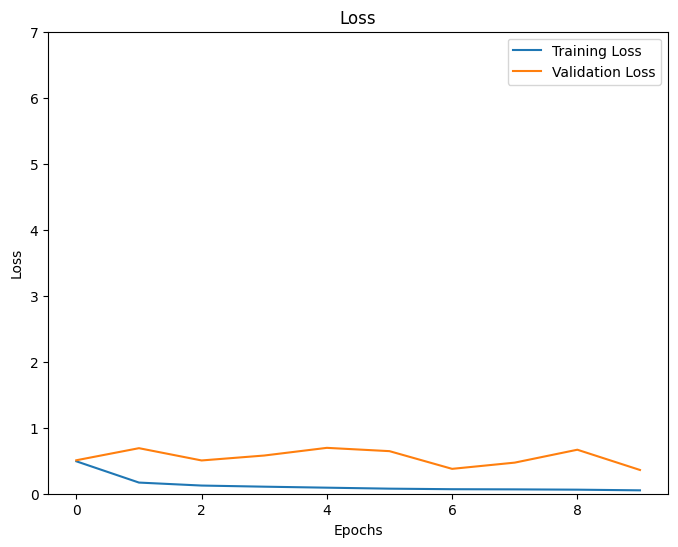

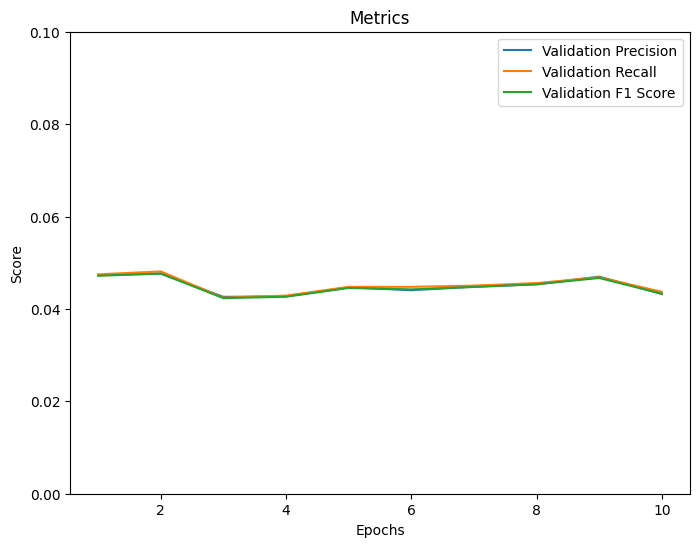

In [39]:
print("Validation Accuracy:", accuracy_val)
print("Validation Precision:", precision_val)
print("Validation Recall:", recall_val)
print("Validation F1 Score:", f1_val)
print("Validation Confusion Matrix:")
print(cm_val)


import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.0, 1.0)
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0.0, 7.0)
plt.legend()
plt.show()

# Plot precision, recall, and F1 score
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_epochs+1),precision_val, label='Validation Precision')
plt.plot(range(1, num_epochs+1),recall_val, label='Validation Recall')
plt.plot(range(1, num_epochs+1),f1_val, label='Validation F1 Score')
plt.title('Metrics')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.ylim(0.0, 0.1)
plt.legend()
plt.show()

